In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [9]:
df= pd.read_csv("Mall_Customers (3).csv")

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Missing Values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
# Dropping CustomerID Column
df.drop("CustomerID",axis=1,inplace=True)
df.drop('Gender',axis=1,inplace=True)

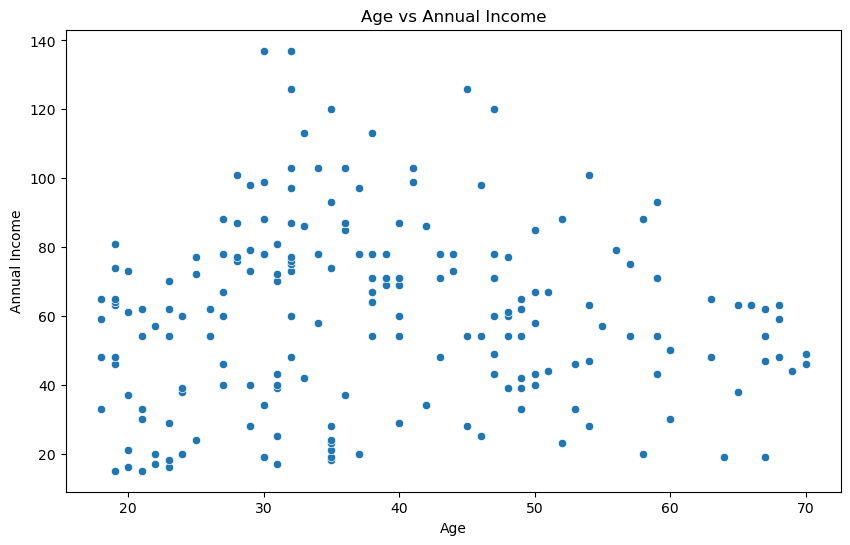

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

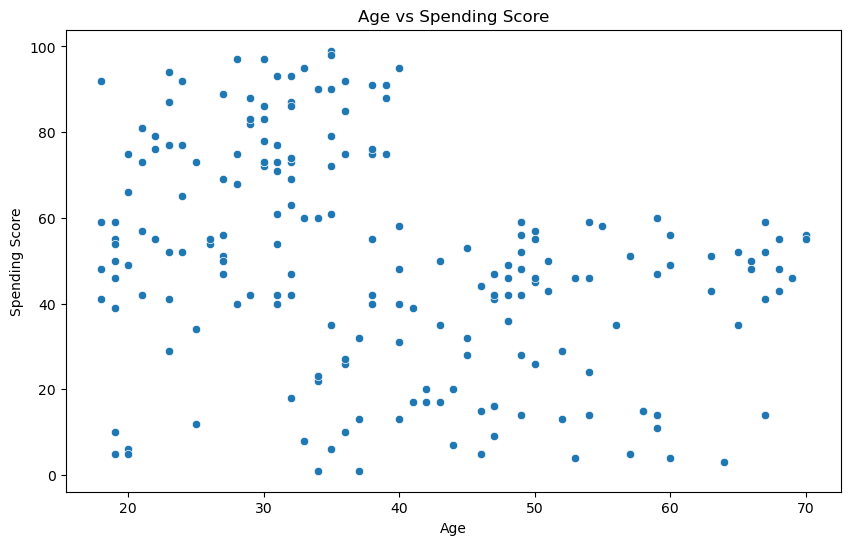

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

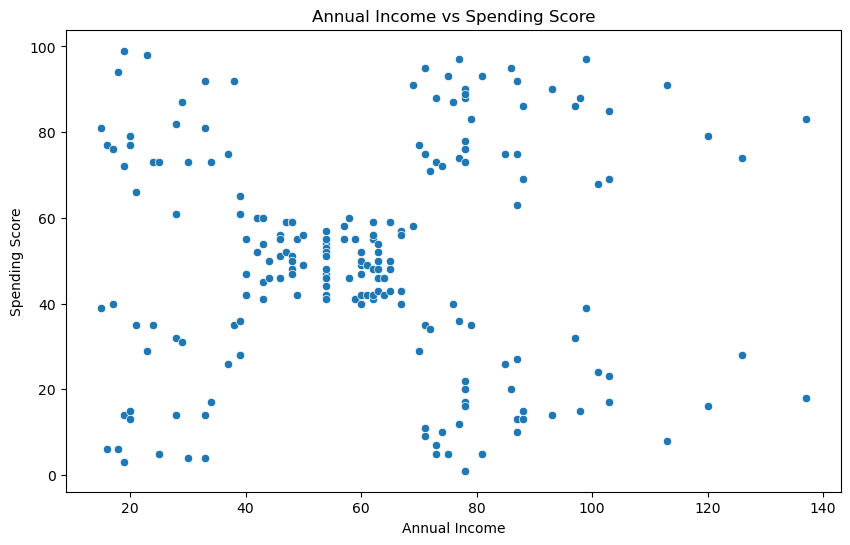

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [17]:
def skewness(skewness):
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"

print("Skewness of Age :", skewness(df['Age'].skew()))
print("Skewness of Annual Income :",skewness(df["Annual Income (k$)"].skew()))
print("Skewness of Spending Score :",skewness(df["Spending Score (1-100)"].skew()))

Skewness of Age : Right Skewed
Skewness of Annual Income : Right Skewed
Skewness of Spending Score : Left Skewed


In [18]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

scaled_df= sc.fit_transform(df)
scaled_df= pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()    

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [19]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df)

df["Cluster"] = kmeans.labels_
df.head()



c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

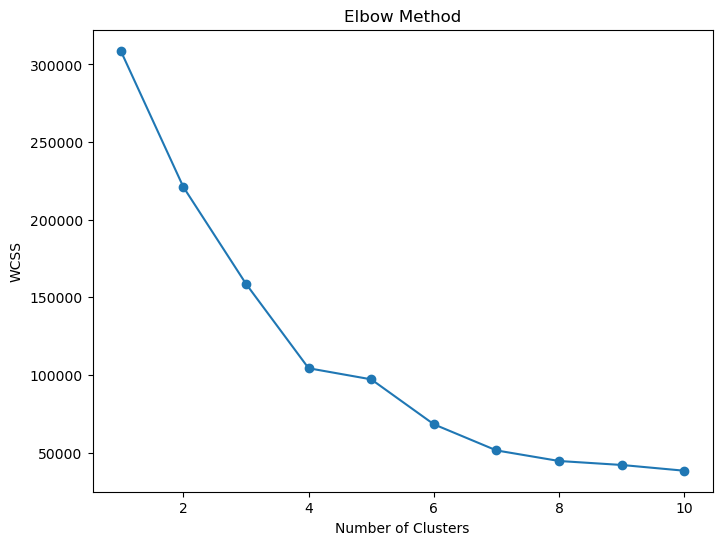

In [20]:
wcss = []
for i in range(1,11) : 
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(df.drop("Cluster",axis=1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,6))
plt.plot(range(1,11),wcss,marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

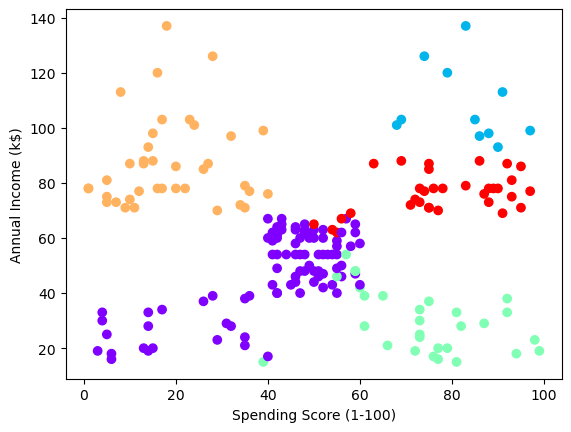

In [21]:
# Display Clusters

plt.scatter(
    df["Spending Score (1-100)"],
    df["Annual Income (k$)"],
    c = df["Cluster"],
    cmap = "rainbow"
)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

In [22]:
# Saving the file
df.to_csv("clusered_Mall_Customers.csv",index=False)

In [23]:
df2=pd.read_csv("clusered_Mall_Customers.csv")

In [24]:
x= df2.drop("Cluster",axis=1)
y= df2["Cluster"]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
rf.score(x_test,y_test)


0.95

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.95


In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.95

In [31]:
y_pred2 = dt.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred2))

Accuracy Score :  0.95


In [32]:
import joblib
joblib.dump(dt,"model.pkl")

['model.pkl']